In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("df_reduced.csv")
df = df.dropna()
df

,Unnamed: 0,CanonicalSMILES,MolecularWeight,XLogP,0,1,4,40,42,58,...,545,600,713,726,730,759,874,918,935,996
0,0,CC(C(=O)O)NC(=O)OC(C)(C)C,189.21,0.9,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,CC(C)(C)OC(=O)NC(CCCN=C(N)N)C(=O)O,274.32,-0.3,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,CC(C)(C)OC(=O)NC(CC(=O)N)C(=O)O,232.23,-0.6,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,3,CC(C)(C)OC(=O)NC(CC(=O)O)C(=O)O,233.22,0.1,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
4,4,CC(C)(C)OC(=O)NC(CS)C(=O)O,221.28,0.8,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,5,CC(C)(C)OC(=O)NC(CCC(=O)N)C(=O)O,246.26,-0.2,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
6,6,CC(C)(C)OC(=O)NC(CCC(=O)O)C(=O)O,247.24,0.4,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
7,7,CC(C)(C)OC(=O)NCC(=O)O,175.18,0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,8,CC(C)(C)OC(=O)NC(CC1=CN=CN1)C(=O)O,255.27,0.7,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
9,9,CCC(C)C(C(=O)O)NC(=O)OC(C)(C)C,231.29,1.6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


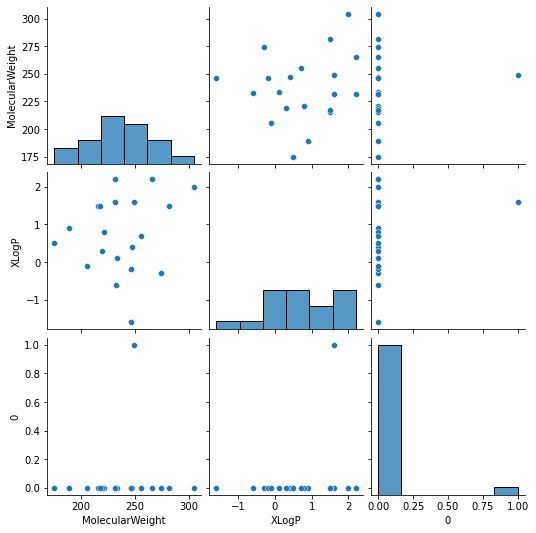

In [18]:
sns.pairplot(df[["MolecularWeight", "XLogP", "0"]])

In [22]:
#randomforestで特徴量削減
# 1. 単にRFでクロスバリデーションを行い、結果を返す関数
import math

def rmse_score(y_true, y_pred):
    """RMSE (Root Mean Square Error: 平均二乗誤差平方根) を計算する関数"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

scores = cross_val_score(model, X, y, cv=kfold)
scores

X = df.iloc[:, 4:]
y = df["XLogP"]

# RF
model = RandomForestRegressor(n_estimators=10, max_depth=3, min_samples_leaf=5, random_state=1)

kf = KFold(n_splits=3, shuffle=True, random_state=42)

score_funcs = {
    "rmse": make_scorer(rmse_score),
    "r2":"r2"
}

scores = cross_validate(model, X, y, cv=kf, scoring=score_funcs)
mean_rmse = scores["test_rmse"].mean()
mean_r2 = scores["test_r2"].mean()
print("RMSE:", mean_rmse)
print("r2_score:", mean_r2)

RMSE: 1.0878632820287477
r2_score: -0.5810052281304535


In [151]:
#def RFR_cv(n_estimators, min_samples_split, max_features, max_depth):
#    
#    val = cross_validate(
#        RandomForestRegressor(
#            n_estimators=int(n_estimators),
#            min_samples_split=int(min_samples_split),
#            max_features=max_features,
#            random_state=0,
#            max_depth=int(max_depth),
#            criterion="mse"           
#        ),
#        X, y,
#        scoring = score_funcs,
#        cv = KFold(n_splits=3, shuffle=True, random_state=0), # 10-fold
#    )["test_r2"].mean()
#    return val #criterion, cv数, test_r2はselfで設定 

def bayesian_opt(model, params, n_iter=20):
    model_cv_bo = BayesianOptimization(model, params)
    gp_params = {"alpha": 1e-5}
    model_cv_bo.maximize(init_points=5, n_iter=n_iter, **gp_params)
    targets = np.array([model_cv_bo.res[p]['target'] for p in range(len(model_cv_bo.res))])
    best_target = model_cv_bo.res[targets.argmax()]

    return best_target

def RFR_best(best_target):
    RFR = RandomForestRegressor(
        random_state=0, 
        criterion="mse", 
        n_estimators=int(best_target["params"]["n_estimators"]),
        min_samples_split=int(best_target["params"]["min_samples_split"]),
        max_features=best_target["params"]["max_features"],
        max_depth=int(best_target["params"]["max_depth"])
    )
    RFR.fit(X, y)
    fti = RFR.feature_importances_
    
    return fti, RFR

In [139]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

X = df.iloc[:, 4:]
y = df["XLogP"]

columns_dict = {}
targets_dict = {}

score_funcs = {"rmse": make_scorer(rmse_score),
               "r2":"r2"}

params = {'n_estimators': (10, 300), 
          'min_samples_split': (2, 25),
          'max_features': (0.5, 0.999),
          'max_depth': (4, 9)}

while len(X.columns) >= 2:
    
    print(len(X.columns))
    
    def RFR_cv(n_estimators, min_samples_split, max_features, max_depth):

        val = cross_validate(
            RandomForestRegressor(
                n_estimators=int(n_estimators),
                min_samples_split=int(min_samples_split),
                max_features=max_features,
                random_state=0,
                max_depth=int(max_depth),
                criterion="mse"           
            ),
            X, y,
            scoring = score_funcs,
            cv = KFold(n_splits=3, shuffle=True, random_state=0), # 10-fold
        )["test_r2"].mean()
       
        return val #criterion, cv数, test_r2はselfで設定 
        
    model = RFR_cv
    
    best_target = bayesian_opt(model, params)
    fti, _ = RFR_best(best_target)
    
    columns_dict[len(X.columns)] = X.columns
    targets_dict[len(X.columns)] = best_target["target"]

    X = X.drop(X.columns[fti.argmin()], axis=1)

44
|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.4122   |  8.494    |  0.5152   |  24.8     |  83.04    |
|  2        | -0.4145   |  4.972    |  0.8273   |  13.2     |  77.01    |
|  3        | -0.4108   |  6.252    |  0.7468   |  21.88    |  147.2    |
|  4        | -0.4066   |  6.141    |  0.6958   |  12.09    |  194.7    |
|  5        | -0.2806   |  6.417    |  0.7274   |  10.73    |  133.7    |
|  6        |  5.991e-0 |  6.601    |  0.7417   |  8.658    |  130.4    |
|  7        |  0.06531  |  5.689    |  0.9649   |  7.275    |  130.4    |
|  8        |  0.1283   |  6.41     |  0.8558   |  5.709    |  126.7    |
|  9        | -0.2667   |  4.0      |  0.999    |  10.47    |  120.2    |
|  10       |  0.1379   |  8.159    |  0.9815   |  2.169    |  128.8    |
|  11       | -0.4068   |  5.776    |  0.7744   |  22.52    |  299.9    |
|  12       |  0.1482   |  4.0     

|  13       |  0.07639  |  8.736    |  0.8823   |  2.06     |  215.5    |
|  14       |  0.05433  |  4.905    |  0.9516   |  2.259    |  207.6    |
|  15       |  0.0799   |  9.0      |  0.999    |  2.0      |  199.8    |
|  16       | -0.1948   |  9.0      |  0.999    |  9.541    |  203.6    |
|  17       |  0.1518   |  4.0      |  0.5      |  2.0      |  194.2    |


KeyboardInterrupt: 

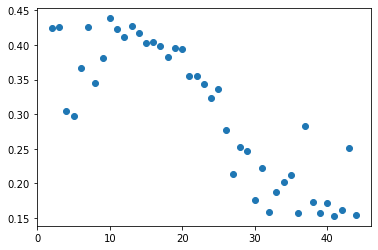

In [108]:
fig, ax = plt.subplots()
ax.scatter(targets_dict.keys(), targets_dict.values())

plt.show()

In [ ]:
#1000⇒1/10ずつ減らす
#1000⇒900⇒810⇒729⇒657⇒592⇒533⇒480⇒470⇒460⇒　　100⇒95⇒
#np.argsortを使う

In [144]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import math

def droplowimportance(X, fti):
    if len(fti) >= 20:
        num = math.floor(len(fti)/10)    
        X = X.drop(X.columns[np.argsort(-fti)[-num:]], axis=1)
    else:
        X = X.drop(X.columns[fti.argmin()], axis=1)
    return X

X = df.iloc[:, 4:]
y = df["XLogP"]

columns_dict = {}
targets_dict = {}

score_funcs = {"rmse": make_scorer(rmse_score),
               "r2":"r2"}

params = {'n_estimators': (10, 300), 
          'min_samples_split': (2, 25),
          'max_features': (0.5, 0.999),
          'max_depth': (4, 9)}

while len(X.columns) >= 7:
    
    print(len(X.columns))
    
    def RFR_cv(n_estimators, min_samples_split, max_features, max_depth):

        val = cross_validate(
            RandomForestRegressor(
                n_estimators=int(n_estimators),
                min_samples_split=int(min_samples_split),
                max_features=max_features,
                random_state=0,
                max_depth=int(max_depth),
                criterion="mse"           
            ),
            X, y,
            scoring = score_funcs,
            cv = KFold(n_splits=3, shuffle=True, random_state=0), # 10-fold
        )["test_r2"].mean()
        
        return val #criterion, cv数, test_r2はselfで設定 
        
    model = RFR_cv
    
    best_target = bayesian_opt(model, params)
    fti, _ = RFR_best(best_target)
    
    columns_dict[len(X.columns)] = X.columns
    targets_dict[len(X.columns)] = best_target["target"]

    X = droplowimportance(X, fti)

44
|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.1453   |  5.736    |  0.9706   |  9.533    |  113.1    |
|  2        | -0.1395   |  5.135    |  0.5499   |  9.954    |  126.8    |
|  3        | -0.1559   |  5.996    |  0.9302   |  9.451    |  160.4    |
|  4        | -0.4089   |  5.363    |  0.7705   |  17.95    |  233.0    |
|  5        | -0.4157   |  7.149    |  0.6607   |  20.01    |  105.4    |
|  6        | -0.4087   |  5.736    |  0.5595   |  22.58    |  290.9    |
|  7        | -0.3736   |  8.015    |  0.9725   |  11.46    |  134.0    |
|  8        | -0.4204   |  8.461    |  0.5298   |  19.92    |  66.45    |
|  9        | -0.1404   |  5.351    |  0.6162   |  9.262    |  113.0    |
|  10       |  0.1222   |  4.0      |  0.5      |  6.11     |  120.2    |
|  11       |  0.1386   |  8.501    |  0.982    |  2.384    |  121.1    |
|  12       |  0.1142   |  4.0     

|  13       |  0.1143   |  8.221    |  0.7763   |  2.076    |  154.4    |
|  14       |  0.207    |  9.0      |  0.5      |  2.0      |  146.2    |
|  15       |  0.1498   |  6.055    |  0.7064   |  2.091    |  142.8    |
|  16       |  0.1118   |  8.611    |  0.9705   |  4.398    |  140.6    |
|  17       |  0.1813   |  4.623    |  0.5      |  2.0      |  137.5    |
|  18       |  0.1277   |  8.977    |  0.7509   |  2.326    |  135.3    |
|  19       |  0.1275   |  4.307    |  0.6134   |  6.987    |  136.4    |
|  20       |  0.1143   |  4.117    |  0.818    |  2.235    |  130.6    |
|  21       |  0.1534   |  8.446    |  0.5175   |  6.772    |  132.0    |
|  22       | -0.1681   |  4.229    |  0.5736   |  9.057    |  130.8    |
|  23       |  0.209    |  9.0      |  0.5      |  2.404    |  129.6    |
|  24       |  0.2131   |  8.452    |  0.5106   |  2.732    |  125.5    |
|  25       |  0.1847   |  4.823    |  0.5002   |  2.199    |  123.2    |
33
|   iter    |  target   | max_depth

27
|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.1696   |  5.392    |  0.8053   |  3.526    |  64.69    |
|  2        | -0.4146   |  7.954    |  0.7401   |  12.55    |  16.69    |
|  3        | -0.3889   |  6.342    |  0.6683   |  11.48    |  266.6    |
|  4        | -0.4075   |  4.1      |  0.7636   |  15.97    |  296.8    |
|  5        | -0.4025   |  7.837    |  0.6755   |  23.31    |  170.1    |
|  6        |  0.1514   |  5.014    |  0.7894   |  2.0      |  67.65    |
|  7        | -0.4164   |  9.0      |  0.999    |  25.0     |  75.01    |
|  8        |  0.1567   |  4.0      |  0.999    |  2.0      |  49.78    |
|  9        |  0.1994   |  4.0      |  0.5      |  2.0      |  119.7    |
|  10       | -0.4154   |  4.045    |  0.6068   |  24.68    |  123.1    |
|  11       |  0.194    |  4.0      |  0.5      |  2.0      |  102.5    |
|  12       |  0.1386   |  4.211   

|  13       | -0.4114   |  4.025    |  0.8873   |  21.15    |  15.86    |
|  14       |  0.1634   |  4.0      |  0.999    |  2.0      |  76.83    |
|  15       |  0.1804   |  4.0      |  0.8952   |  3.298    |  300.0    |
|  16       | -0.4061   |  7.361    |  0.9797   |  20.41    |  300.0    |
|  17       |  0.2384   |  4.0      |  0.5      |  2.0      |  286.1    |
|  18       |  0.1866   |  4.0      |  0.999    |  2.0      |  270.7    |
|  19       | -0.4094   |  4.0      |  0.5      |  17.56    |  272.2    |
|  20       | -0.4137   |  9.0      |  0.5      |  15.19    |  74.78    |
|  21       |  0.2255   |  9.0      |  0.999    |  2.0      |  257.5    |
|  22       |  0.253    |  6.338    |  0.6505   |  2.086    |  185.9    |
|  23       | -0.4089   |  4.0      |  0.5      |  13.99    |  185.6    |
|  24       |  0.2168   |  9.0      |  0.999    |  2.0      |  292.7    |
|  25       |  0.229    |  8.476    |  0.9233   |  2.55     |  196.7    |
21
|   iter    |  target   | max_depth

18
|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.3006   |  5.547    |  0.7681   |  3.371    |  212.6    |
|  2        | -0.4101   |  4.164    |  0.5601   |  14.13    |  214.9    |
|  3        |  0.2615   |  6.87     |  0.5829   |  5.354    |  287.4    |
|  4        | -0.4082   |  7.082    |  0.643    |  21.84    |  278.2    |
|  5        | -0.4074   |  4.542    |  0.797    |  19.76    |  236.5    |
|  6        | -0.4098   |  6.417    |  0.5664   |  15.99    |  219.3    |
|  7        |  0.3526   |  7.472    |  0.999    |  2.0      |  207.3    |
|  8        |  0.3695   |  6.601    |  0.5023   |  2.0      |  299.1    |
|  9        | -0.4068   |  8.738    |  0.9425   |  15.56    |  299.8    |
|  10       |  0.3265   |  4.0      |  0.5      |  2.0      |  194.6    |
|  11       |  0.3455   |  9.0      |  0.999    |  2.0      |  180.0    |
|  12       | -0.4049   |  4.0     

|  13       | -0.4076   |  4.0      |  0.999    |  12.76    |  213.8    |
|  14       |  0.3801   |  9.0      |  0.5      |  2.0      |  233.9    |
|  15       |  0.323    |  4.0      |  0.5      |  2.0      |  188.0    |
|  16       |  0.3236   |  4.0      |  0.5      |  2.0      |  161.0    |
|  17       |  0.3123   |  4.0      |  0.999    |  2.0      |  143.4    |
|  18       | -0.4099   |  4.453    |  0.8186   |  21.44    |  149.9    |
|  19       |  0.3733   |  9.0      |  0.5      |  2.0      |  279.2    |
|  20       | -0.3921   |  5.717    |  0.7162   |  24.19    |  10.15    |
|  21       |  0.3246   |  8.414    |  0.687    |  2.129    |  65.8     |
|  22       | -0.4169   |  9.0      |  0.999    |  21.66    |  70.78    |
|  23       | -0.4094   |  9.0      |  0.5      |  15.34    |  272.4    |
|  24       |  0.3285   |  8.308    |  0.8263   |  2.094    |  173.3    |
|  25       |  0.3117   |  4.0      |  0.999    |  2.0      |  291.1    |
15
|   iter    |  target   | max_depth

|  1        | -0.4144   |  6.658    |  0.8314   |  22.28    |  139.2    |
|  2        | -0.4091   |  6.833    |  0.942    |  19.16    |  275.0    |
|  3        | -0.416    |  6.781    |  0.6217   |  12.36    |  143.8    |
|  4        | -0.4084   |  5.579    |  0.9465   |  24.24    |  279.8    |
|  5        | -0.4077   |  8.548    |  0.5124   |  24.33    |  252.9    |
|  6        | -0.411    |  6.304    |  0.555    |  24.92    |  216.6    |
|  7        | -0.3921   |  7.208    |  0.7562   |  23.95    |  10.81    |
|  8        | -0.3921   |  7.544    |  0.8768   |  23.77    |  10.94    |
|  9        |  0.4223   |  4.543    |  0.6145   |  2.679    |  11.49    |
|  10       |  0.3496   |  4.0      |  0.5      |  2.0      |  21.07    |
|  11       |  0.346    |  4.0      |  0.5      |  2.0      |  50.67    |
|  12       |  0.3433   |  4.0      |  0.5      |  2.0      |  76.68    |
|  13       | -0.4154   |  9.0      |  0.5      |  25.0     |  71.33    |
|  14       |  0.3123   |  4.0      | 

|  14       |  0.4105   |  4.0      |  0.5      |  2.0      |  102.3    |
|  15       |  0.4043   |  4.0      |  0.5      |  2.0      |  114.1    |
|  16       | -0.4156   |  4.0      |  0.5      |  14.24    |  112.5    |
|  17       |  0.3675   |  6.937    |  0.9224   |  2.209    |  126.3    |
|  18       |  0.334    |  4.98     |  0.5593   |  5.586    |  299.9    |
|  19       | -0.4076   |  6.328    |  0.9025   |  19.48    |  297.1    |
|  20       |  0.393    |  5.775    |  0.5581   |  2.454    |  289.0    |
|  21       |  0.3951   |  4.0      |  0.5      |  2.0      |  275.1    |
|  22       |  0.3795   |  9.0      |  0.999    |  2.0      |  262.0    |
|  23       | -0.4063   |  9.0      |  0.5      |  14.27    |  268.2    |
|  24       |  0.3614   |  4.0      |  0.999    |  2.0      |  251.0    |
|  25       |  0.3584   |  5.335    |  0.8422   |  2.031    |  10.2     |
10
|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-----------------------------------

|  1        |  0.3058   |  8.079    |  0.5555   |  4.479    |  106.8    |
|  2        | -0.4065   |  4.241    |  0.7231   |  16.13    |  178.9    |
|  3        | -0.4077   |  7.071    |  0.6266   |  20.39    |  234.0    |
|  4        |  0.3024   |  6.343    |  0.7865   |  4.491    |  194.0    |
|  5        | -0.4129   |  8.661    |  0.6863   |  15.58    |  28.3     |
|  6        |  0.2893   |  6.644    |  0.8624   |  5.892    |  194.2    |
|  7        |  0.3323   |  9.0      |  0.5      |  2.0      |  207.6    |
|  8        | -0.4102   |  4.0      |  0.9009   |  25.0     |  98.11    |
|  9        |  0.331    |  9.0      |  0.5      |  2.0      |  123.0    |
|  10       | -0.4102   |  8.807    |  0.6267   |  20.16    |  134.3    |
|  11       |  0.3183   |  9.0      |  0.999    |  2.0      |  300.0    |
|  12       | -0.4061   |  9.0      |  0.714    |  21.62    |  300.0    |
|  13       |  0.319    |  8.653    |  0.999    |  2.0      |  285.3    |
|  14       |  0.3155   |  4.0      | 

|  14       |  0.3845   |  4.0      |  0.5      |  2.0      |  52.09    |
|  15       |  0.376    |  7.803    |  0.9021   |  2.063    |  34.85    |
|  16       |  0.3786   |  4.0      |  0.5      |  2.0      |  91.43    |
|  17       |  0.3543   |  9.0      |  0.999    |  2.0      |  263.9    |
|  18       | -0.4063   |  4.0      |  0.5      |  20.51    |  268.8    |
|  19       | -0.4066   |  4.114    |  0.7933   |  17.3     |  41.06    |
|  20       |  0.3653   |  9.0      |  0.999    |  2.0      |  106.2    |
|  21       | -0.4149   |  4.081    |  0.9779   |  19.59    |  102.8    |
|  22       |  0.3803   |  4.0      |  0.999    |  2.0      |  17.85    |
|  23       |  0.3691   |  9.0      |  0.5      |  2.0      |  81.95    |
|  24       |  0.3979   |  8.654    |  0.698    |  2.024    |  10.18    |
|  25       |  0.3535   |  9.0      |  0.999    |  2.0      |  291.0    |
5
|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
------------------------------------

|  1        | -0.4076   |  4.642    |  0.6863   |  17.98    |  297.5    |
|  2        | -0.4073   |  6.791    |  0.8477   |  20.16    |  286.6    |
|  3        | -0.4125   |  4.626    |  0.9206   |  23.46    |  129.8    |
|  4        |  0.07982  |  5.332    |  0.8051   |  9.789    |  98.05    |
|  5        | -0.4119   |  7.794    |  0.6927   |  12.09    |  54.93    |
|  6        |  0.4806   |  4.0      |  0.999    |  2.0      |  89.21    |
|  7        |  0.4806   |  4.664    |  0.944    |  2.951    |  89.17    |
|  8        |  0.4772   |  4.0      |  0.999    |  2.0      |  77.02    |
|  9        |  0.5068   |  9.0      |  0.5      |  2.0      |  208.5    |
|  10       | -0.4082   |  4.0      |  0.999    |  25.0     |  199.3    |
|  11       |  0.5036   |  9.0      |  0.5      |  2.0      |  229.3    |
|  12       | -0.4061   |  9.0      |  0.999    |  25.0     |  241.2    |
|  13       | -0.3921   |  4.0      |  0.5      |  25.0     |  10.0     |
|  14       |  0.5024   |  9.0      | 

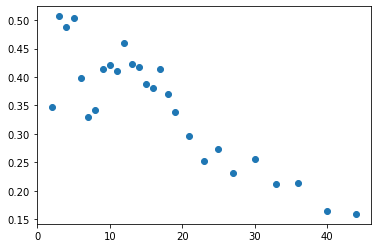

In [145]:
fig, ax = plt.subplots()
ax.scatter(targets_dict.keys(), targets_dict.values())

plt.show()

In [163]:
targets_dict

{44: 0.15921222635030463,
 40: 0.16505014693463127,
 36: 0.21305631724490603,
 33: 0.21106074938979166,
 30: 0.2556268174391658,
 27: 0.23060597785654147,
 25: 0.2740319758921102,
 23: 0.25299956049805955,
 21: 0.29648007540617627,
 19: 0.3388111205139753,
 18: 0.3694963744476971,
 17: 0.41404267724488375,
 16: 0.380121868946432,
 15: 0.3880914691505748,
 14: 0.41840250304460036,
 13: 0.42230074549149804,
 12: 0.45939713338627824,
 11: 0.4104686300439573,
 10: 0.4212221404357183,
 9: 0.4139599914465329,
 8: 0.34117778325447207,
 7: 0.3302663026559687,
 6: 0.3979212425017405,
 5: 0.5031650194790759,
 4: 0.48815921680532365,
 3: 0.5068480173118328,
 2: 0.3465591440184787}

In [164]:
X = df.iloc[:, 4:]
y = df["XLogP"]

X = df.loc[:, columns_dict[12]]

def RFR_cv(n_estimators, min_samples_split, max_features, max_depth):

    val = cross_validate(
        RandomForestRegressor(
            n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=max_features,
            random_state=0,
            max_depth=int(max_depth),
            criterion="mse"           
        ),
        X, y,
        scoring = score_funcs,
        cv = KFold(n_splits=3, shuffle=True, random_state=0), # 10-fold
    )["test_r2"].mean()
        
    return val #criterion, cv数, test_r2はselfで設定 

model = RFR_cv

best_target = bayesian_opt(model, params, n_iter=100)

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.2681   |  7.931    |  0.686    |  10.19    |  261.0    |
|  2        | -0.4132   |  8.86     |  0.7278   |  21.85    |  142.0    |
|  3        | -0.4189   |  7.46     |  0.5928   |  22.96    |  33.98    |
|  4        | -0.4053   |  4.09     |  0.711    |  13.99    |  183.3    |
|  5        |  0.111    |  5.31     |  0.5466   |  8.588    |  250.7    |
|  6        |  0.05232  |  5.011    |  0.9262   |  8.881    |  251.4    |
|  7        |  0.06996  |  4.604    |  0.7751   |  8.158    |  246.3    |
|  8        |  0.4029   |  8.479    |  0.8667   |  3.323    |  248.9    |
|  9        |  0.4396   |  9.0      |  0.5      |  2.0      |  242.1    |
|  10       |  0.4402   |  9.0      |  0.5      |  2.0      |  230.7    |
|  11       |  0.4417   |  9.0      |  0.5      |  2.0      |  218.0    |
|  12       | -0.4094   |  9.0      | 

|  67       |  0.4414   |  9.0      |  0.5      |  2.0      |  300.0    |
|  68       |  0.4587   |  9.0      |  0.5      |  2.0      |  138.0    |
|  69       |  0.4473   |  9.0      |  0.5      |  2.0      |  207.2    |
|  70       |  0.4492   |  9.0      |  0.999    |  2.0      |  47.13    |
|  71       |  0.4481   |  9.0      |  0.999    |  2.0      |  56.66    |
|  72       |  0.4566   |  9.0      |  0.5      |  2.0      |  124.2    |
|  73       |  0.4459   |  9.0      |  0.5      |  2.0      |  212.5    |
|  74       |  0.4594   |  9.0      |  0.5      |  2.0      |  111.8    |
|  75       |  0.458    |  9.0      |  0.5      |  2.0      |  100.2    |
|  76       |  0.4538   |  9.0      |  0.5      |  2.0      |  189.6    |
|  77       |  0.4405   |  9.0      |  0.999    |  2.0      |  86.46    |
|  78       |  0.4408   |  9.0      |  0.5      |  2.0      |  250.8    |
|  79       |  0.4012   |  4.661    |  0.8993   |  2.014    |  164.3    |
|  80       |  0.4356   |  9.0      | 

In [165]:
RF = RandomForestRegressor(
    n_estimators=int(62.3),
    min_samples_split=int(2),
    max_features=0.5,
    random_state=0,
    max_depth=int(9.0),
    criterion="mse"           
    )

RF.fit(X, y)
y_pred = RF.predict(X)


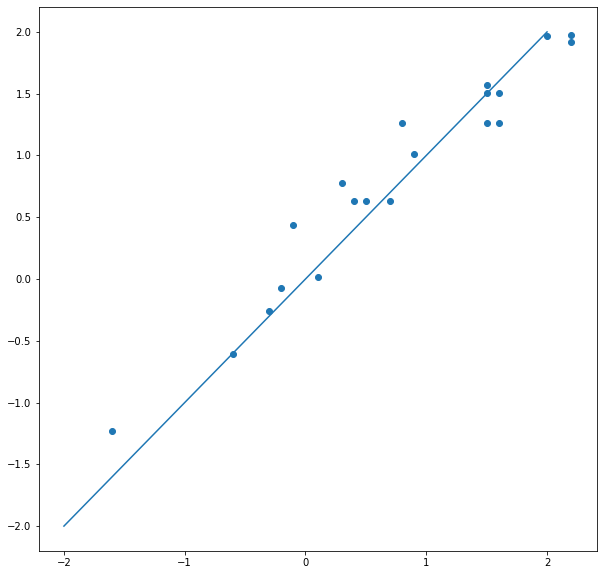

In [168]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(y, y_pred)
ax.plot([-2,2], [-2,2])

In [160]:
X

,58,64,147,726,759
0,0,0,0,0,0
1,0,0,1,0,0
2,1,0,1,0,0
3,1,0,0,0,0
4,0,0,0,0,0
5,0,0,1,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0


In [175]:
best_target

{'target': 0.45970184072128534,
 'params': {'max_depth': 9.0,
  'max_features': 0.5,
  'min_samples_split': 2.0,
  'n_estimators': 62.29550914318917}}